# Solution

In [115]:
# put all python import statements here
from solvers import solver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Preliminaries 
These texts are used to understand the nature of the Formula and its independent from the implementation phase. These following test cases cells are just a way to formulate the proper approach for the answer and get the optimal  results. 

### Test Case 1 : 
Using the following parameters $ \alpha = \beta = \gamma = \delta = 1 $ and the following function $ f(t) = -\sin(t) - (\cos(t))^2 - \cos(t) $ and $ g(t) = \sin(t) + (\cos(t))^2 - \cos(t) $ with the initial conditions of $ x = 2 , y = 0 $ . It has the following exact solution $ x(t) = 1 + \cos(t) $ and $ y(t) = 1 - \cos(t) $.

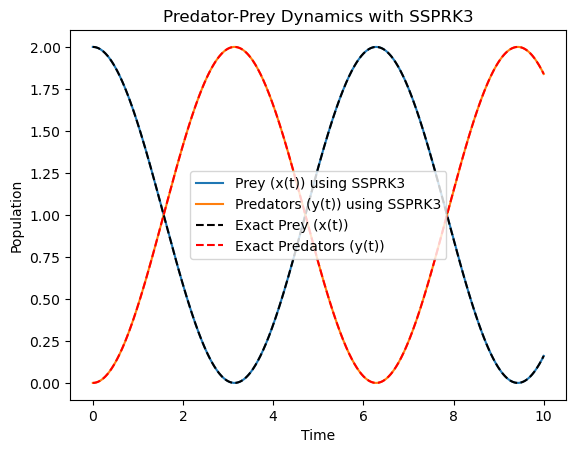

In [116]:
""" Define the function of the rhs of the ODE for test case 1 """


def rhs_prey_predator_c1(t, y):
    x, y = y
    # Define the function of rhs f(x) and g(x)
    ft = -np.sin(t) - (np.cos(t))**2 - np.cos(t)
    gt = np.sin(t) + (np.cos(t))**2 - np.cos(t)
    alpha = 1
    beta = 1
    gamma = delta = 1
    dxdt = alpha * x - beta * x * y + ft
    dydt = gamma * x * y - delta * y + gt
    return np.array([dxdt, dydt])


''' Defining the main function time parameters and initial conditions of test case 2'''
t0 = 0
T = 10
dt = 2.5e-4
initial_condition = np.array([2, 0])


''' Get the exact solution of test case 1'''
t_exact = np.linspace(t0, T, 1000)
x_exact = 1 + np.cos(t_exact)
y_exact = 1 - np.cos(t_exact)

''' Create the solver object and solve the ODE and plot it'''
# Integrate the system using SSPRK3 method
c1t1_values, population_values1 = solver(
    rhs_prey_predator_c1, initial_condition, t0, dt, T, "SSPRK3")
# Extracting prey and predator populations of each method
prey_pop_SSPRK3 = [pop[0] for pop in population_values1]
predator_pop_SSPRK3 = [pop[1] for pop in population_values1]
# Plot the populations over time
plt.plot(c1t1_values, prey_pop_SSPRK3, label='Prey (x(t)) using SSPRK3')
plt.plot(c1t1_values, predator_pop_SSPRK3,
         label='Predators (y(t)) using SSPRK3')
# Plot the exact solutions
plt.plot(t_exact, x_exact, 'k--', label='Exact Prey (x(t))')
plt.plot(t_exact, y_exact, 'r--', label='Exact Predators (y(t))')
# Add labels and title to plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Dynamics with SSPRK3')
plt.show()

### Test Case 2 : 
Using the following parameters $ \alpha = 2/3 , \beta = 4/3,  \gamma = \delta = 1 $ and the following function $ f(t) =0 $ and $ g(t) =0 $ with the initial conditions of $ x = 0.9 , y = 0.9 $ . 

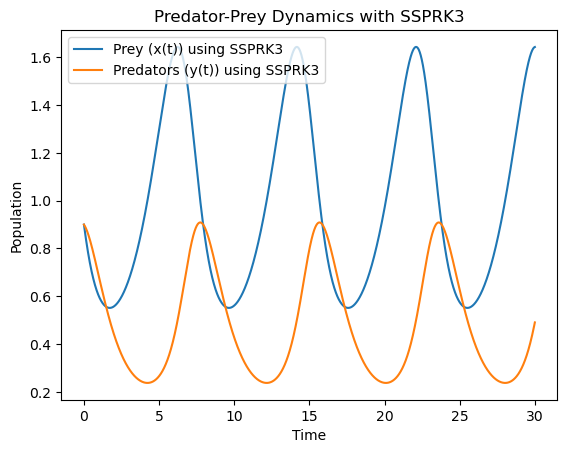

In [117]:
""" Define the function of the rhs of the ODE for test case 2 """


def rhs_prey_predator_c2(t, y):
    x, y = y
    # Define the function of rhs f(x) and g(x)
    ft = 0
    gt = 0
    alpha = 2/3
    beta = 4/3
    gamma = delta = 1
    dxdt = alpha * x - beta * x * y + ft
    dydt = gamma * x * y - delta * y + gt
    return np.array([dxdt, dydt])


''' Defining the main function time parameters and initial conditions of test case 2'''
t0 = 0
T = 30
dt = 2.5e-4
initial_condition = np.array([0.9, 0.9])

''' Create the solver object and solve the ODE and plot it'''
# Integrate the system using SSPRK3 method
c2t1_values, population_values_3 = solver(
    rhs_prey_predator_c2, initial_condition, t0, dt, T, "SSPRK3")

# Extracting prey and predator populations of each method
prey_pop_SSPRK3_2 = [pop[0] for pop in population_values_3]
predator_pop_SSPRK3_2 = [pop[1] for pop in population_values_3]

# Plot the populations over time
plt.plot(c2t1_values, prey_pop_SSPRK3_2, label='Prey (x(t)) using SSPRK3')
plt.plot(c2t1_values, predator_pop_SSPRK3_2,
         label='Predators (y(t)) using SSPRK3')

# Add labels and title to plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Dynamics with SSPRK3')
plt.show()

## Implementation
### Third Numerical Method
The task requires us to choose a third numerical method which has been taught in the module COMP2421 Numerical Computation. Therefore I chose to go for Euler Method. The reason of choosing euler method because its one of the fundamental numerical computation techniques used for modelling a system of differential equations, moreover to compare it with its other version 'Heun' method. The next cell will be dedicated to set up the euler method which will be taken from the lecture notes of COMP2421 Numerical Computation Module from University of Leeds.

In [118]:
'''Defining the euler method function'''
def Euler_Method(rhs, y0, t0, T, dt):
    # Number of time steps
    n_steps = int((T - t0) / dt) + 1
    # Initialize arrays to store time values and solution
    t_values = np.linspace(t0, T, n_steps)
    y_values = np.zeros((n_steps, len(y0)))
    # Set initial conditions
    y_values[0] = y0
    # Time-stepping loop
    for i in range(n_steps - 1):
        y_values[i + 1] = y_values[i] + dt * rhs(t_values[i], y_values[i])
    return t_values, y_values

''' Defining the euler method compute function which evaluates the euler method
for different time steps'''
def Euler_Method_Compute(rhs, y0, t0, T, dts):
    results = []
    for dt in dts:
        t_values, y_values = Euler_Method(rhs, y0, t0, T, dt)
        results.append((dt, t_values, y_values))
    return results

### Adjustments on the Initial Testing:
The initial testing phase has established the relationship between the prey and the predator as an oscillatory behavior of increase and decrease of population. Moreover, it also illustrated that the population fluctuates based on a population of a certain species. The graph above shows that there is an inphase relationship between the prey and predators so the formula does works. The only adjustment to do is to create a function which performs all of the process of assigning, calculating, and plotting of the graph to save time and effort. 

In this stage I will take every test case that is given and then perform a numerical analysis on the numerical method and the effect of size of the timestep on the accuracy of the method. Test Case 1 will have at least the final time as a product of 2.5 and $\pi$ . The second test case will have the final time as 30. Then we will have to compare the values of dt which are : $dt = [T/100, T/200, T/400, T/800, T/1600]$. On each case we will examine the size of the error in each time step and then plot it so that we can examine it.

In [119]:
''' Create a function which computes the numerical method'''
def compute_dts(rhs, y0, t0, T, dts, method):
    # Set up the simulation array which will contain the results
    results = []
    # Iterate through the different dt values
    for dt in dts:
        t_values, y_values = solver(rhs, y0, t0, dt, T, method)
        results.append((dt, t_values, y_values))
    return results


''' Function to plot the results of the numerical method'''
def plot_results(results, method):
    
    # Color map for different dt values
    colors = plt.cm.viridis(np.linspace(0, 1, len(results)))

    for i, (dt, t_values, y_values) in enumerate(results):
        
        # Extract the prey and predator populations
        prey_pop = [pop[0] for pop in y_values]
        predator_pop = [pop[1] for pop in y_values]

        # Plot the populations over time
        plt.plot(t_values, prey_pop,
                 label='Prey (x(t)) using dt = {}'.format(dt), color=colors[i])
        plt.plot(t_values, predator_pop, label='Predators (y(t)) using dt = {}'.format(
            dt), color=colors[i], linestyle='--')

    # Add labels and title to plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Predator-Prey Dynamics using {}'.format(method))
    plt.show()


''' Function to compute and plot the error of the numerical 
method compared to the exact solution for test case 1 '''

def compute_and_plot_error1(results, t0, T, method):
    # Define the exact solution
    t_exact = np.linspace(t0, T, 1000)
    x_exact = 1 + np.cos(t_exact)
    y_exact = 1 - np.cos(t_exact)

    # Get a unique color for each dt value
    colors = plt.cm.viridis(np.linspace(0, 1, len(results)))
    # Prepare the figure for plotting errors
    plt.figure(figsize=(10, 5))

    for i, (dt, t_values, y_values) in enumerate(results):
        # Interpolate the exact solution to match the time values of the numerical solutions
        x_exact_interp = np.interp(t_values, t_exact, x_exact)
        y_exact_interp = np.interp(t_values, t_exact, y_exact)

        # Compute the absolute error between the numerical solution and the exact solution
        error_prey = np.abs([pop[0] for pop in y_values] - x_exact_interp)
        error_predator = np.abs([pop[1] for pop in y_values] - y_exact_interp)

        # Plot the error over time for each dt
        plt.plot(t_values, error_prey,
                 label='Prey Error with dt = {}'.format(dt), color=colors[i])
        plt.plot(t_values, error_predator, label='Predator Error with dt = {}'.format(
            dt), linestyle='--', color=colors[i])

    # Add labels and title to plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel('Time')
    plt.ylabel('Absolute Error')
    plt.title('Error in Predator-Prey Dynamics using {}'.format(method))
    plt.show()
    
    
''' A function that gets the accuracy of the method based on the result of
the finest dt value.'''
def getAccuracy(result):
    # Extract the finest dt value data 
    finest_dt, t_fine, y_fine = result[-1]
    errors = []
    # Interpolate the exact solution to match the time values of the numerical solutions
    interp_func = interp1d(t_fine, y_fine, axis=0, fill_value='extrapolate')
    
    for dt,t,y in result[:-1]:
        y_ref_interp = interp_func(t)
        # Calculate the error
        error = np.abs(y-y_ref_interp)
        errors.append((dt,t,error))
    return errors

''' A function that plots the error of the method based on the result of
the finest dt value.'''
def plotAccuracy(errors, method):
    # Get a unique color for each dt value
    colors = plt.cm.viridis(np.linspace(0, 1, len(errors)))
    # Prepare the figure for plotting errors
    plt.figure(figsize=(10, 5))
    for i, (dt, t_values, error) in enumerate(errors):
        plt.plot(t_values, error[:, 0], label=f'Prey Error with dt = {dt}', color=colors[i], linestyle='--')
        plt.plot(t_values, error[:, 1], label=f'Predator Error with dt = {dt}', color=colors[i], linestyle='-')
    # Add labels and title to plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel('Time')
    plt.ylabel('Absolute Error')
    plt.title('Error in Predator-Prey Dynamics using {}'.format(method))
    plt.show()

## Results: 
### Test Case 1
On the first stage of showcasing the results we will compare each iteration with each other than we will plot the graph of each value of dt with the exact solution, which is provided by our boss. Afterwards, we will compare the error between the results so we can have a better idea on how the size affect the accuracy of the method.

For test case A, you should use $T = 2.5\pi$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.

The exact solutions are the following: $ f(t) = 1 + \cos(t)  $ and $g(t) = 1 - \cos(t) $. The following python cells will be dedicated to set up the equation and then plot each graph.

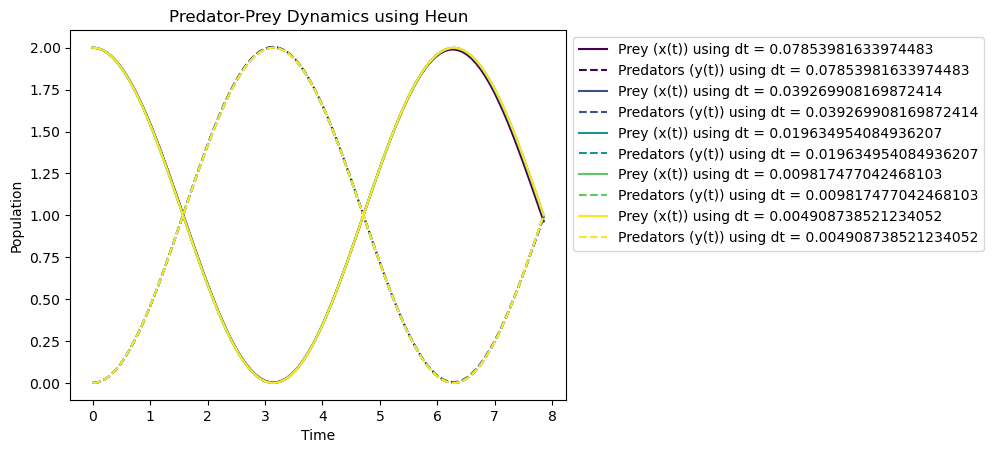

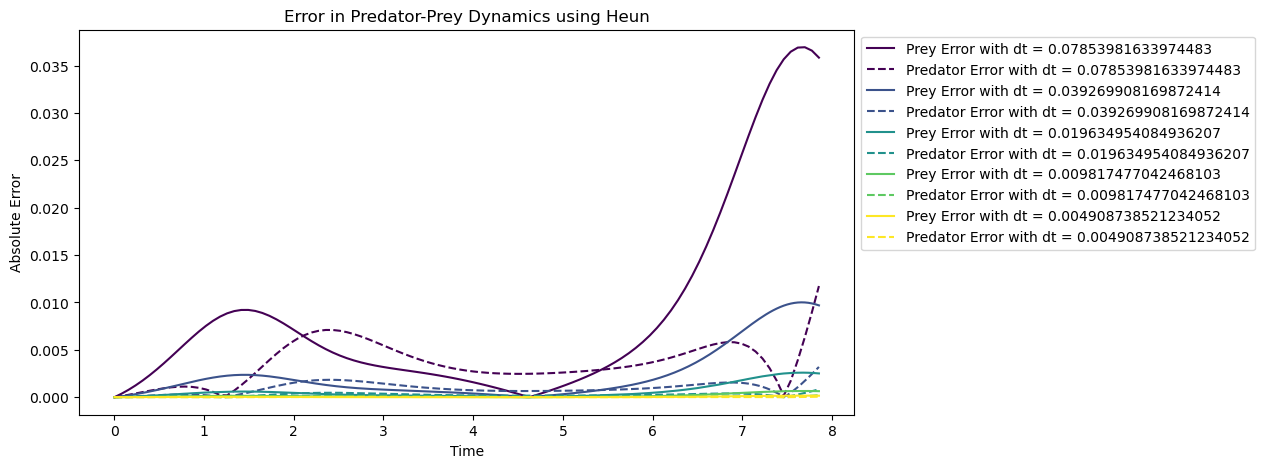

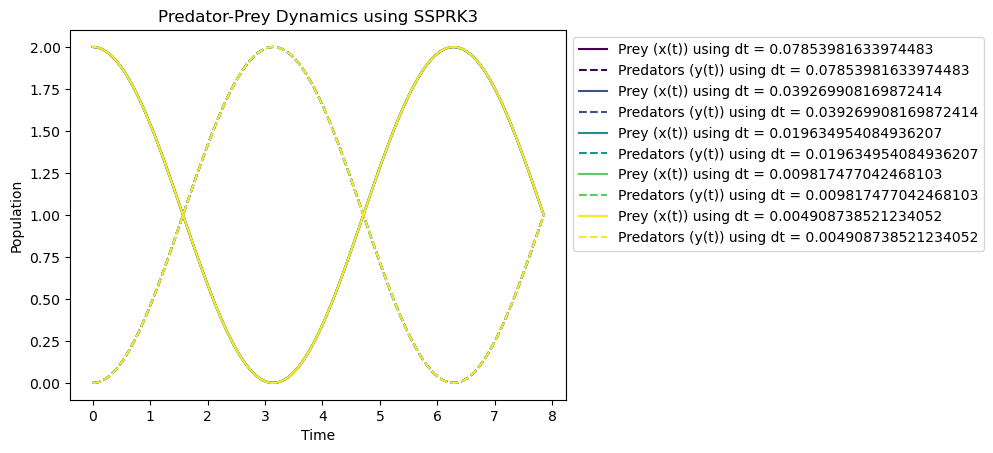

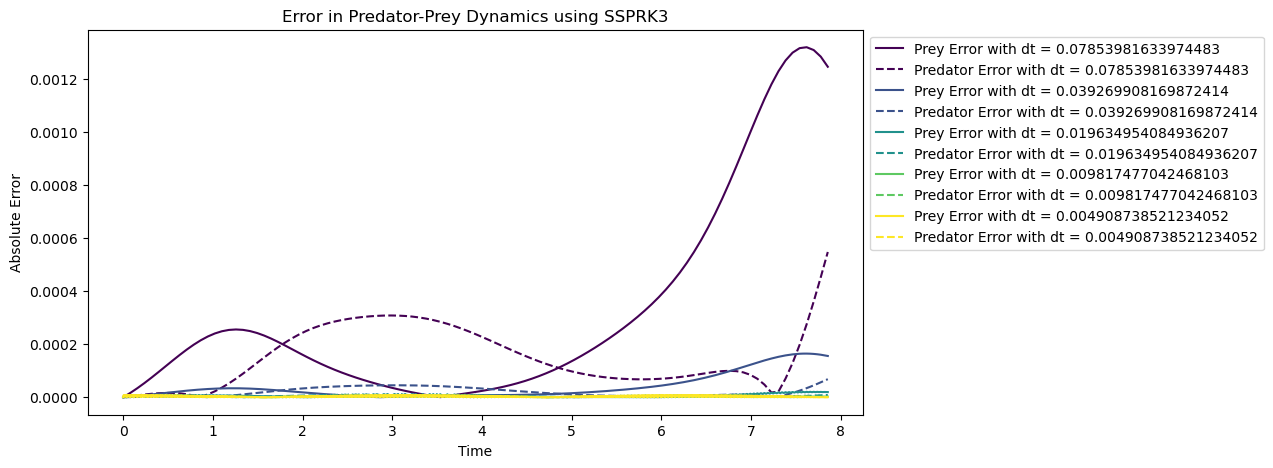

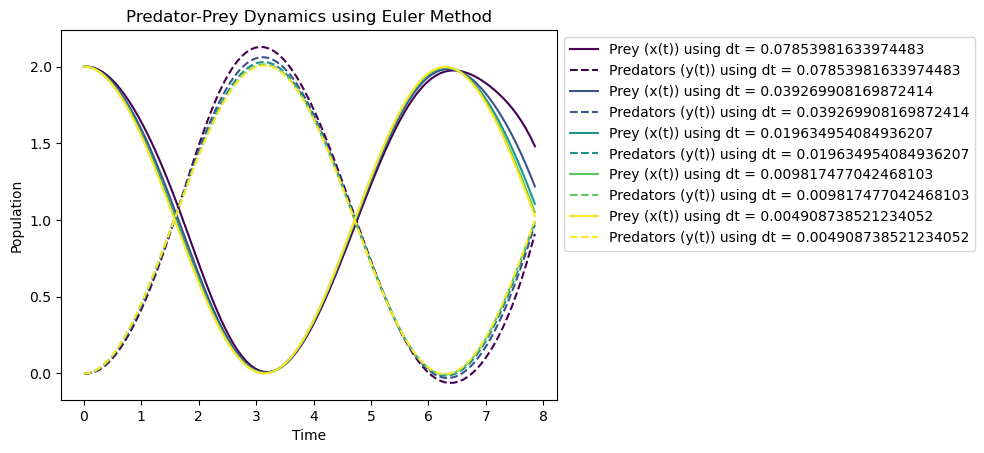

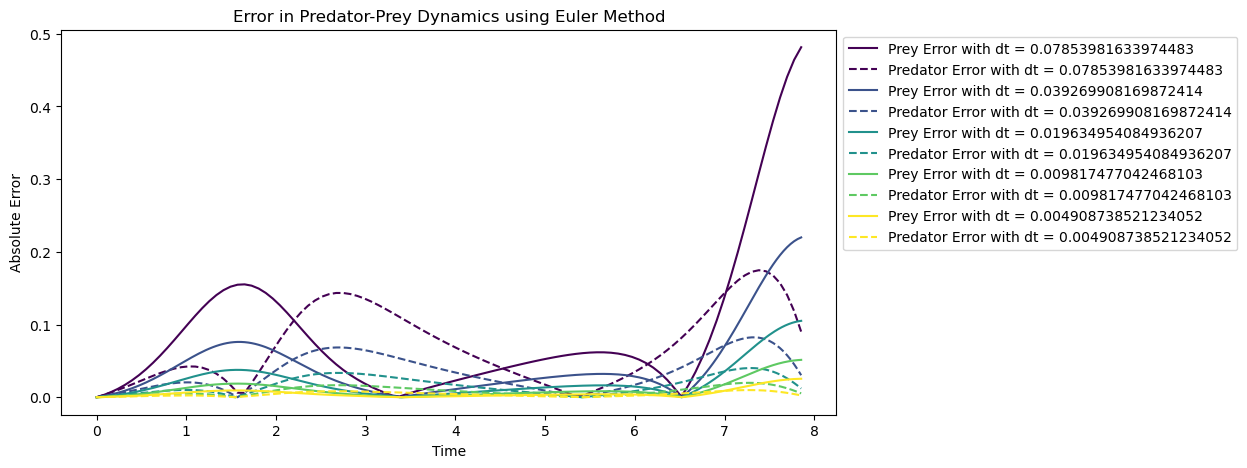

In [120]:
# Define the parameters of the problem
t0 = 0
T = 2.5 * np.pi
dts = [T/100.0, T/200.0, T/400.0, T/800.0, T/1600.0]
initial_condition = np.array([2.0, 0.0])
method1 = 'Heun'
method2 = 'SSPRK3'

# Compute the numerical solutions
simulation_results1 = compute_dts(rhs_prey_predator_c1, initial_condition, t0, T, dts, method1)
simulation_results2 = compute_dts(rhs_prey_predator_c1, initial_condition, t0, T, dts, method2)
simulation_results3 = Euler_Method_Compute(rhs_prey_predator_c1, initial_condition, t0, T, dts)

# Plot the results
plot_results(simulation_results1, method1)
compute_and_plot_error1(simulation_results1, t0, T, method1)
plot_results(simulation_results2, method2)
compute_and_plot_error1(simulation_results2, t0, T, method2)
plot_results(simulation_results3, 'Euler Method')
compute_and_plot_error1(simulation_results3, t0, T, 'Euler Method')

### Test Case 2
On the first stage of showcasing the results we will compare each iteration with each other than we will plot the graph of each value of dt with the exact solution. We can conclude from our previous implementation of the second test case is that the solution is periodic, which means is follows the same pattern and behavior. Hence the approach to find the finest computation and then compare the results of the finest computations to its precedence. Therefore, we can have a clear idea on the behavior of the size of dt on the accuracy of the solution.

For test case B, you should use $T = 30$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.

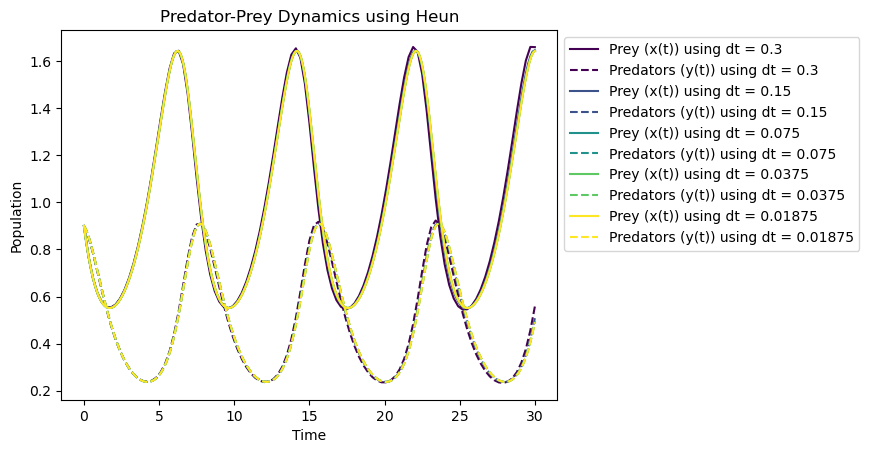

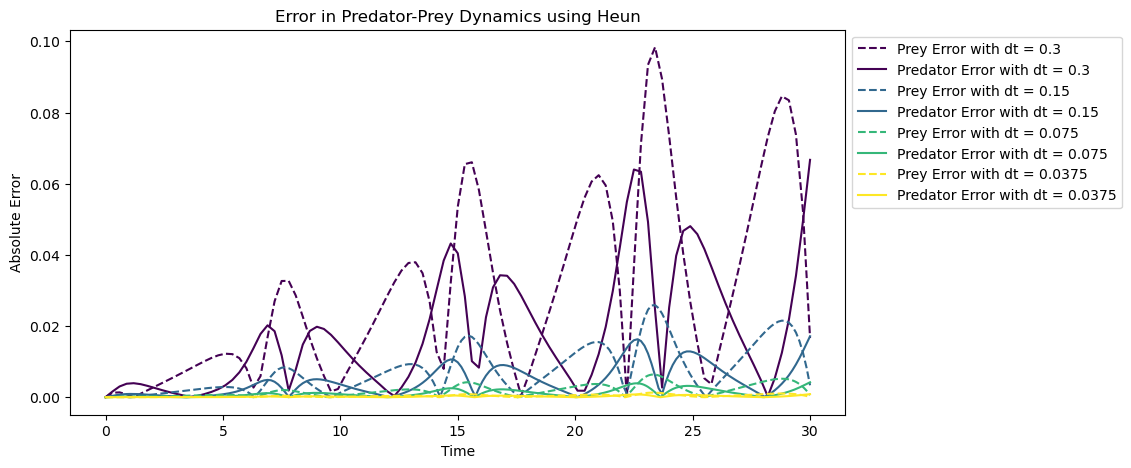

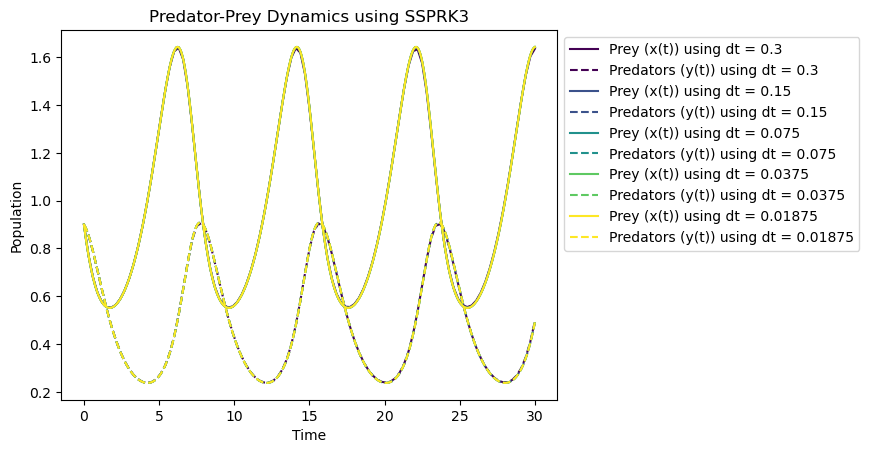

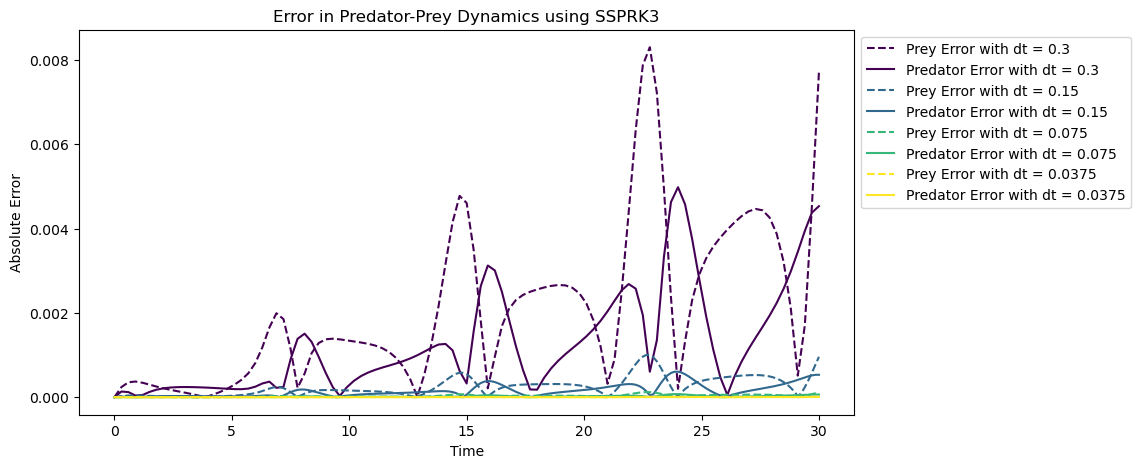

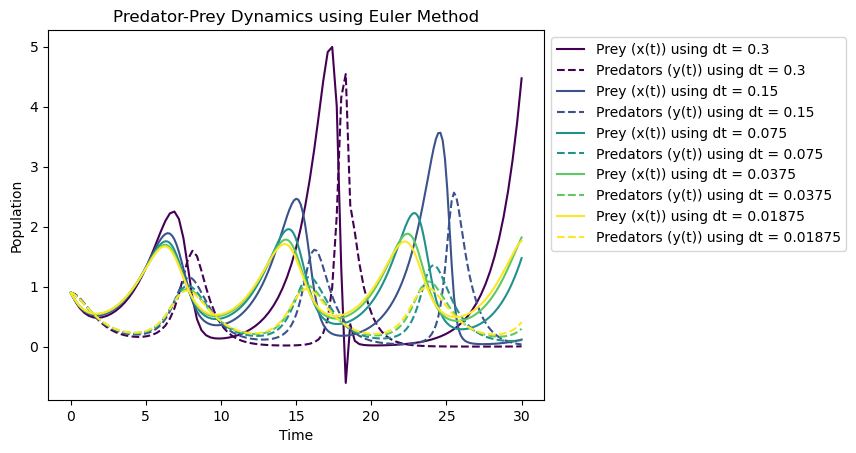

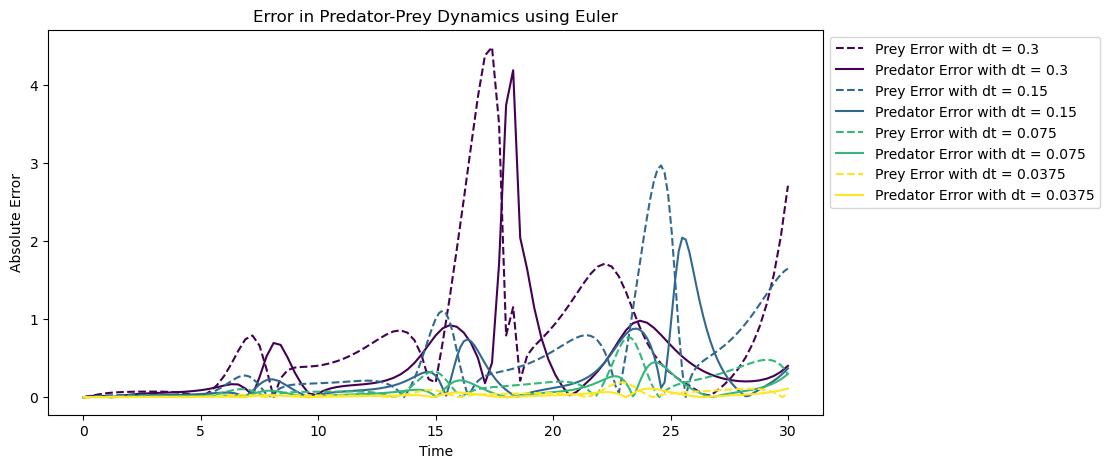

In [121]:
# Define the parameters of the problem
t0 = 0
T = 30
dts = [T/100.0, T/200.0, T/400.0, T/800.0, T/1600.0]
initial_condition = np.array([0.9, 0.9])
method1 = 'Heun'
method2 = 'SSPRK3'

# Compute the numerical solutions
simulation_results_1 = compute_dts(rhs_prey_predator_c2, initial_condition, t0, T, dts, method1)
simulation_results_2 = compute_dts(rhs_prey_predator_c2, initial_condition, t0, T, dts, method2)
simulation_results_3 = Euler_Method_Compute(rhs_prey_predator_c2, initial_condition, t0, T, dts)
# Plot the results
plot_results(simulation_results_1, method1)
plotAccuracy(getAccuracy(simulation_results_1), method1)
plot_results(simulation_results_2, method2)
plotAccuracy(getAccuracy(simulation_results_2), method2)
plot_results(simulation_results_3, 'Euler Method')
plotAccuracy(getAccuracy(simulation_results_3), 'Euler')


Based on the results of the test cases, we could clearly notice the behavior of numerical computational methods wth the change of size of steps. As we could observe that SSPRK3 numerical method has a better accuracy than the Heun Method since as we decreased the step size , the error decreased dramatically to the point where they achieved the exact accuracy. Euler method has a decent accuracy however the stiffness of the model and its unexpected nature has threw the accuracy of the method off. Yet it achieved the expected behavior.

## Analysis

[*Comment on the efficiency and accuracy of each approach. [250 words]*]

## Conclusion

[*Compare the methods that you have results for, and any other relevant methods from the module, and make a recommendation of which method you think is best. [300 words]*]